In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## TODO: Considera solo i tempi durante la fase "train"

# Model Base

## Minibatch 64

In [3]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-base-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [4]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.547133,1.420180,3.204430,8675.380090,4.624610
std,0.0,273.519652,1.071091,0.057165,0.164437,198.720656,0.211539
min,0.0,0.000000,0.212039,1.252125,3.142573,5928.234375,4.394698
25%,0.0,236.500000,0.804324,1.402784,3.184572,8568.507812,4.591323
50%,0.0,473.000000,1.097208,1.413981,3.189006,8678.347656,4.604190
75%,0.0,709.500000,2.000317,1.426460,3.194191,8790.675781,4.618479
max,0.0,946.000000,4.645350,2.764896,8.043108,9544.792969,10.808004


In [5]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.561692,0.742028,4.503720,5324.832807,5.245748
std,0.0,273.519652,1.079211,0.041579,0.149827,103.528390,0.178970
min,0.0,0.000000,0.140899,0.672698,4.442531,3413.285156,5.135102
25%,0.0,236.500000,0.755379,0.724463,4.470101,5267.619141,5.212304
50%,0.0,473.000000,1.201868,0.738107,4.489837,5323.179688,5.229445
75%,0.0,709.500000,2.026901,0.750358,4.512732,5379.203125,5.251626
max,0.0,946.000000,4.580988,1.604820,8.879420,5626.480469,10.484240


In [6]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(4379.505657672882), np.float64(4967.723456859589))

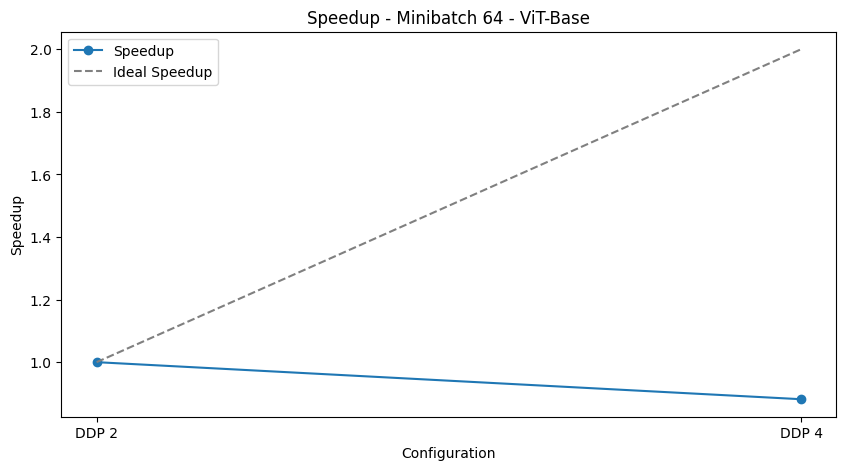

In [16]:
# plot speedup
plt.figure(figsize=(10, 5))
base = ddp_2["minibatch_time"].sum()
speedups = [1, ddp_2["minibatch_time"].sum() / ddp_4["minibatch_time"].sum()]
plt.plot([1, 2], speedups, marker='o', label="Speedup")
# plot ideal speedup
plt.plot([1, 2], [1, 2], linestyle='--', color='gray', label="Ideal Speedup")
plt.xticks([1, 2], ["DDP 2", "DDP 4"])
plt.xlabel("Configuration")
plt.ylabel("Speedup")
plt.title("Speedup - Minibatch 64 - ViT-Base")
plt.legend()

## Minibatch 128 

In [21]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-base-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [10]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,1.937309,2.773651,5.672149,10450.835476,8.445800
std,0.0,136.976275,1.107789,0.112194,0.270008,187.888725,0.370906
min,0.0,0.000000,0.471661,1.562769,3.144025,6856.664062,4.706795
25%,0.0,118.250000,1.045738,2.757339,5.603082,10438.895508,8.366578
50%,0.0,236.500000,1.481119,2.767634,5.647631,10464.523438,8.417400
75%,0.0,354.750000,2.673430,2.779127,5.699427,10487.056641,8.475939
max,0.0,473.000000,4.628050,4.705650,10.529380,10554.632812,15.235030


In [11]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,1.934966,1.439752,4.628086,8759.305833,6.067839
std,0.0,136.976275,1.122956,0.077377,0.282114,208.780763,0.338819
min,0.0,0.000000,0.415728,0.661393,4.468700,5916.949219,5.130093
25%,0.0,118.250000,1.048730,1.415744,4.585085,8666.479492,6.019185
50%,0.0,236.500000,1.490032,1.431455,4.595475,8760.289062,6.036119
75%,0.0,354.750000,2.677676,1.450884,4.622810,8869.908203,6.063319
max,0.0,473.000000,4.626504,2.599953,10.607540,9257.621094,13.207493


In [12]:
ddp_2["minibatch_time"].sum() , ddp_4["minibatch_time"].sum()

(np.float64(4003.309293270111), np.float64(2876.155464887619))

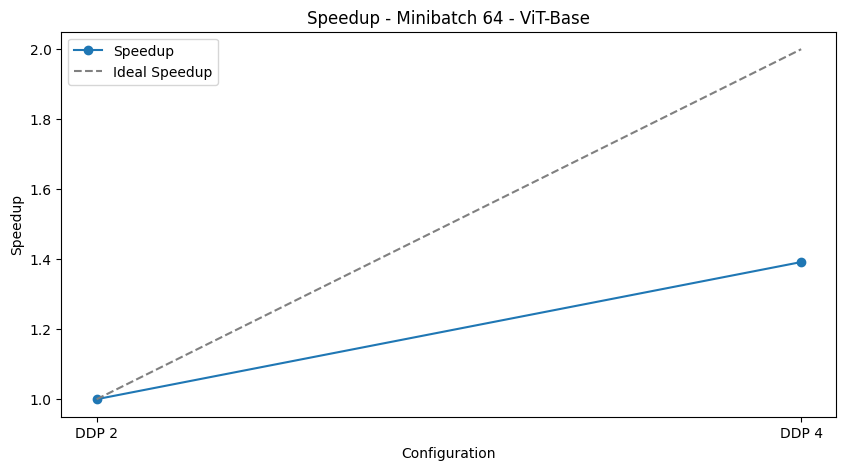

In [22]:
# plot speedup
plt.figure(figsize=(10, 5))
base = ddp_2["minibatch_time"].sum()
speedups = [1, ddp_2["minibatch_time"].sum() / ddp_4["minibatch_time"].sum()]
plt.plot([1, 2], speedups, marker='o', label="Speedup")
# plot ideal speedup
plt.plot([1, 2], [1, 2], linestyle='--', color='gray', label="Ideal Speedup")
plt.xticks([1, 2], ["DDP 2", "DDP 4"])
plt.xlabel("Configuration")
plt.ylabel("Speedup")
plt.title("Speedup - Minibatch 64 - ViT-Base")
plt.legend()

## Minibatch 256

In [23]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-base-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-base-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]
ddp_8["minibatch_time"] = ddp_8["forward_time"] + ddp_8["backward_time"]

In [14]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,2.538188,5.157401,10.212814,17982.967333,15.370214
std,0.0,68.560193,1.010746,0.229659,0.334688,305.127002,0.541468
min,0.0,0.000000,1.020173,3.758684,7.721792,13688.625000,11.480477
25%,0.0,59.000000,1.655563,5.110292,10.113798,18018.277344,15.233160
50%,0.0,118.000000,2.308512,5.122274,10.183628,18024.285156,15.318199
75%,0.0,177.000000,3.344548,5.139959,10.259256,18037.500000,15.426635
max,0.0,236.000000,4.612312,8.047204,14.179366,18054.128906,22.226570


In [15]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,2.511039,2.720964,5.906503,10367.900646,8.627467
std,0.0,68.560193,1.009360,0.112102,0.469458,131.283580,0.567597
min,0.0,0.000000,0.971667,2.012062,4.841820,8674.648438,6.853882
25%,0.0,59.000000,1.641267,2.700271,5.803581,10348.695312,8.519203
50%,0.0,118.000000,2.287951,2.708108,5.849741,10386.519531,8.567112
75%,0.0,177.000000,3.290315,2.719238,5.923029,10415.214844,8.638613
max,0.0,236.000000,4.603352,4.182779,12.755499,10477.656250,16.938279


In [16]:
ddp_8.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,2.538612,1.400276,5.494010,8806.627472,6.894286
std,0.0,68.560193,1.010441,0.097792,0.669288,300.330259,0.750682
min,0.0,0.000000,0.906678,1.019649,5.288717,5948.218750,6.320976
25%,0.0,59.000000,1.696833,1.376231,5.403654,8661.632812,6.798629
50%,0.0,118.000000,2.332911,1.387169,5.438203,8773.296875,6.828567
75%,0.0,177.000000,3.317721,1.402285,5.473741,8902.894531,6.862537
max,0.0,236.000000,4.605924,2.627477,15.668423,10151.796875,18.295900


In [17]:
ddp_2["minibatch_time"].sum() , ddp_4["minibatch_time"].sum(), ddp_8["minibatch_time"].sum()

(np.float64(3642.7408151626587),
 np.float64(2044.7096021175385),
 np.float64(1633.945710659027))

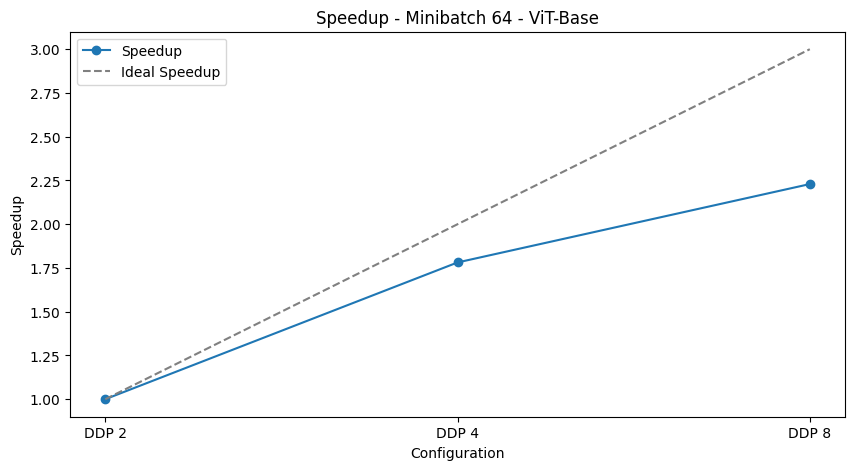

In [26]:
# plot speedup
plt.figure(figsize=(10, 5))
base = ddp_2["minibatch_time"].sum()
speedups = [1, base / ddp_4["minibatch_time"].sum(), base / ddp_8["minibatch_time"].sum()]
plt.plot([1, 2, 3], speedups, marker='o', label="Speedup")
# plot ideal speedup
plt.plot([1, 2, 3], [1, 2, 3], linestyle='--', color='gray', label="Ideal Speedup")
plt.xticks([1, 2, 3], ["DDP 2", "DDP 4", "DDP 8"])
plt.xlabel("Configuration")
plt.ylabel("Speedup")
plt.title("Speedup - Minibatch 64 - ViT-Base")
plt.legend()

# Model Large

## Minibatch 64

In [18]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [19]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,0.959934,4.548175,10.842148,22626.543893,15.390323
std,0.0,273.519652,0.630278,0.061565,0.399503,411.519940,0.450042
min,0.0,0.000000,0.164053,4.127904,10.723365,14915.394531,14.908000
25%,0.0,236.500000,0.619434,4.527635,10.764079,22442.960938,15.312639
50%,0.0,473.000000,0.817525,4.543808,10.792057,22617.738281,15.347970
75%,0.0,709.500000,1.077714,4.560462,10.860208,22788.761719,15.401420
max,0.0,946.000000,4.641535,6.109727,22.424093,26630.656250,28.533820


In [20]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,0.988605,2.339443,15.731344,14335.631592,18.070787
std,0.0,273.519652,0.677369,0.061668,0.349469,278.390367,0.390841
min,0.0,0.000000,0.048766,2.068234,15.633510,8457.152344,17.827895
25%,0.0,236.500000,0.583410,2.311015,15.671219,14223.001953,18.008513
50%,0.0,473.000000,0.854393,2.327489,15.705707,14327.152344,18.049942
75%,0.0,709.500000,1.194474,2.351577,15.754497,14426.408203,18.095243
max,0.0,946.000000,4.581965,3.583461,26.286566,15994.468750,29.870028


In [21]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(14574.635562419891), np.float64(17113.035032510757))

## Minibatch 128

In [22]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [23]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,0.998666,9.794258,20.481039,26909.435951,30.275296
std,0.0,136.976275,0.704088,0.276365,0.796703,483.850311,1.022363
min,0.0,0.000000,0.311417,4.214372,10.752244,17669.777344,14.966616
25%,0.0,118.250000,0.650405,9.773400,20.218480,26893.196289,30.019925
50%,0.0,236.500000,0.806544,9.797538,20.433611,26941.312500,30.243341
75%,0.0,354.750000,1.004001,9.826617,20.702723,26990.595703,30.493773
max,0.0,473.000000,4.638955,11.786717,33.116829,27055.980469,44.903546


In [24]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,0.992993,4.623764,15.849203,22150.032882,20.472967
std,0.0,136.976275,0.731653,0.149777,0.681572,703.226290,0.774792
min,0.0,0.000000,0.174899,2.113426,15.725574,11814.265625,17.938506
25%,0.0,118.250000,0.607497,4.597881,15.779650,21901.383789,20.405039
50%,0.0,236.500000,0.804245,4.617775,15.803826,22098.064453,20.435055
75%,0.0,354.750000,1.070698,4.647305,15.845758,22294.614258,20.467179
max,0.0,473.000000,4.612364,6.444641,30.606289,25863.601562,37.050931


In [25]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(14350.49048614502), np.float64(9704.186350345612))

## Minibatch 256

In [ ]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_256_vit-large-patch16-224-in21k_model.csv")
ddp_8 = pd.read_csv("../log/rank_0_synch_ddp_8_minibatch_256_vit-large-patch16-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]
ddp_8 = ddp_8[ddp_8["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]
ddp_8["minibatch_time"] = ddp_8["forward_time"] + ddp_8["backward_time"]

: 

: 

: 

In [ ]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.071564,18.705361,38.657577,47358.545622,57.362938
std,0.0,68.560193,0.825886,0.382067,1.383479,815.671977,1.587513
min,0.0,0.000000,0.378126,13.475581,30.483085,35993.179688,43.958666
25%,0.0,59.000000,0.648561,18.611402,37.925959,47394.136719,56.612422
50%,0.0,118.000000,0.768725,18.703798,38.122653,47417.898438,56.922635
75%,0.0,177.000000,1.043947,18.819683,39.103238,47492.554688,57.996531
max,0.0,236.000000,4.621063,20.252036,50.179415,47730.367188,70.431451


: 

: 

: 

In [ ]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.074134,9.488114,20.930617,27075.424281,30.418731
std,0.0,68.560193,0.835109,0.207973,1.371149,499.627893,1.518985
min,0.0,0.000000,0.336417,6.833165,16.302825,21253.105469,23.135990
25%,0.0,59.000000,0.636081,9.468333,20.608850,27093.054688,30.095229
50%,0.0,118.000000,0.781240,9.489144,20.748932,27136.277344,30.232972
75%,0.0,177.000000,1.059738,9.511075,21.045363,27151.941406,30.528412
max,0.0,236.000000,4.654000,11.162753,40.605302,27201.855469,51.768055


: 

: 

: 

In [ ]:
ddp_8.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,0.0,118.000000,1.078700,4.551615,18.566948,22623.001599,23.118563
std,0.0,68.560193,0.848475,0.144192,1.227827,785.762409,1.313893
min,0.0,0.000000,0.160560,3.284855,18.312783,14939.242188,21.747307
25%,0.0,59.000000,0.615042,4.517646,18.428498,22312.132812,22.971000
50%,0.0,118.000000,0.827790,4.540602,18.480300,22484.613281,23.024823
75%,0.0,177.000000,1.083312,4.562979,18.538038,22729.945312,23.085490
max,0.0,236.000000,4.674962,5.814012,37.340506,25707.300781,43.154517


: 

: 

: 

In [ ]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum(), ddp_8["minibatch_time"].sum()

(np.float64(13595.01642203331),
 np.float64(7209.239175319672),
 np.float64(5479.099380493164))

: 

: 

: 

# Model Huge

## Minibatch 64

In [ ]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_64_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_64_vit-huge-patch14-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

: 

: 

In [ ]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.620153,10.916446,23.513923,32898.992662,34.430369
std,0.0,273.519652,1.084867,0.098535,0.908211,313.598769,0.984528
min,0.0,0.000000,0.276955,9.652237,22.283745,24870.160156,31.935982
25%,0.0,236.500000,0.843158,10.885362,23.205224,32834.251953,34.115489
50%,0.0,473.000000,1.178347,10.911478,23.373985,32889.488281,34.280249
75%,0.0,709.500000,2.064493,10.947935,23.700533,32954.281250,34.629913
max,0.0,946.000000,4.612998,13.273218,48.283123,34408.441406,61.556341


: 

: 

In [ ]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,947.0,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,0.0,473.000000,1.621712,5.692423,32.631710,29584.895752,38.324133
std,0.0,273.519652,1.109684,0.092688,0.592048,662.793188,0.659260
min,0.0,0.000000,0.145248,5.056458,32.477443,13898.078125,37.701733
25%,0.0,236.500000,0.823037,5.645157,32.523203,29372.896484,38.234892
50%,0.0,473.000000,1.239596,5.679637,32.588236,29553.660156,38.282210
75%,0.0,709.500000,2.148699,5.729599,32.672586,29794.003906,38.348175
max,0.0,946.000000,4.618061,7.827787,50.520484,32509.957031,58.348271


: 

: 

In [ ]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(32605.559341430664), np.float64(36292.95387530327))

: 

: 

## Minibatch 128

In [26]:
ddp_2 = pd.read_csv("../log/rank_0_synch_ddp_2_minibatch_128_vit-huge-patch14-224-in21k_model.csv")
ddp_4 = pd.read_csv("../log/rank_0_synch_ddp_4_minibatch_128_vit-huge-patch14-224-in21k_model.csv")

ddp_2 = ddp_2[ddp_2["phase"] == "train"]
ddp_4 = ddp_4[ddp_4["phase"] == "train"]

ddp_2["minibatch_time"] = ddp_2["forward_time"] + ddp_2["backward_time"]
ddp_4["minibatch_time"] = ddp_4["forward_time"] + ddp_4["backward_time"]

In [27]:
ddp_2.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,2.041943,20.764940,44.671420,57321.180248,65.436361
std,0.0,136.976275,1.139522,0.529946,1.679545,1273.338096,2.107796
min,0.0,0.000000,0.548186,9.587463,22.366322,32029.378906,31.953785
25%,0.0,118.250000,1.128246,20.750718,44.094851,57289.723633,64.855746
50%,0.0,236.500000,1.573404,20.767467,44.476323,57333.041016,65.250614
75%,0.0,354.750000,2.851890,20.795218,45.132032,57528.449219,65.945591
max,0.0,473.000000,4.625878,23.299074,68.747637,57877.324219,92.046711


In [28]:
ddp_4.describe()

,epoch,batch_id,loss,forward_time,backward_time,peak_memory_usage(MB),minibatch_time
count,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,0.0,236.500000,2.031621,10.916449,32.789422,34560.649130,43.705871
std,0.0,136.976275,1.139341,0.274641,1.251932,667.790075,1.346541
min,0.0,0.000000,0.539403,5.278074,32.518694,23796.371094,37.796768
25%,0.0,118.250000,1.141133,10.892547,32.682216,34593.692383,43.612691
50%,0.0,236.500000,1.582705,10.921637,32.718067,34594.558594,43.651156
75%,0.0,354.750000,2.834491,10.971604,32.757808,34619.478516,43.700694
max,0.0,473.000000,4.613140,12.382788,59.937693,34860.410156,72.320482


In [29]:
ddp_2["minibatch_time"].sum(), ddp_4["minibatch_time"].sum()

(np.float64(31016.834914684296), np.float64(20716.582660913467))